In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
from costs import *
from models import *
from helpers import *
from build import *

## Load the training data into feature matrix, class labels, and event ids:

In [4]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)

In [5]:
print(y.shape)
head = range(10)
print(y[head])
print(tX[ range(2) ])
print(ids[head])

(5000,)
[ 1. -1. -1.  1.  1.  1. -1. -1.  1. -1.]
[[  1.38470000e+02   5.16550000e+01   9.78270000e+01   2.79800000e+01
    9.10000000e-01   1.24711000e+02   2.66600000e+00   3.06400000e+00
    4.19280000e+01   1.97760000e+02   1.58200000e+00   1.39600000e+00
    2.00000000e-01   3.26380000e+01   1.01700000e+00   3.81000000e-01
    5.16260000e+01   2.27300000e+00  -2.41400000e+00   1.68240000e+01
   -2.77000000e-01   2.58733000e+02   2.00000000e+00   6.74350000e+01
    2.15000000e+00   4.44000000e-01   4.60620000e+01   1.24000000e+00
   -2.47500000e+00   1.13497000e+02]
 [  2.19057000e+02   7.24610000e+01   1.24835000e+02   5.50600000e+00
   -9.99000000e+02  -9.99000000e+02  -9.99000000e+02   3.77100000e+00
    4.69360000e+01   1.22986000e+02   1.93200000e+00  -1.38200000e+00
   -9.99000000e+02   2.47590000e+01  -1.06300000e+00   3.32000000e-01
    4.78300000e+01   1.34700000e+00  -2.56900000e+00   2.84990000e+01
    9.60000000e-01   9.03550000e+01   1.00000000e+00   5.03960000e+01
   

## Do your thing crazy machine learning thing here :) ...

Let's begin with a simple linear regression with least_square gradient descent

In [34]:
gamma = 1.0
max_iter = 10
loss, w = least_squares_SGD(y, tX, gamma, max_iter)

OverflowError: math range error

In [33]:
loss, w = reg_logistic_regression(y, tX)

Current iteration=0, the loss=[[ 3465.7359028]]


OverflowError: math range error

In [71]:
gamma = 1.0
max_iter = 10
loss, w = least_squares_SGD(y, tX, gamma, max_iter)

In [72]:
print(tX[ range(3)])
x_first_column = tX[:, 0]

[[  1.38470000e+02   5.16550000e+01   9.78270000e+01   2.79800000e+01
    9.10000000e-01   1.24711000e+02   2.66600000e+00   3.06400000e+00
    4.19280000e+01   1.97760000e+02   1.58200000e+00   1.39600000e+00
    2.00000000e-01   3.26380000e+01   1.01700000e+00   3.81000000e-01
    5.16260000e+01   2.27300000e+00  -2.41400000e+00   1.68240000e+01
   -2.77000000e-01   2.58733000e+02   2.00000000e+00   6.74350000e+01
    2.15000000e+00   4.44000000e-01   4.60620000e+01   1.24000000e+00
   -2.47500000e+00   1.13497000e+02]
 [  2.19057000e+02   7.24610000e+01   1.24835000e+02   5.50600000e+00
   -9.99000000e+02  -9.99000000e+02  -9.99000000e+02   3.77100000e+00
    4.69360000e+01   1.22986000e+02   1.93200000e+00  -1.38200000e+00
   -9.99000000e+02   2.47590000e+01  -1.06300000e+00   3.32000000e-01
    4.78300000e+01   1.34700000e+00  -2.56900000e+00   2.84990000e+01
    9.60000000e-01   9.03550000e+01   1.00000000e+00   5.03960000e+01
   -7.08000000e-01  -6.42000000e-01  -9.99000000e+02 

In [73]:
# let's do a prediction only about first column, just for fun
tx_first_column = build_poly(x_first_column, 2)
loss, w = least_squares_SGD(y, tX, gamma, 15)

In [74]:
print(len(w))
print(loss)

30
2.59175549721e+96


In [75]:
print(tX.shape)
np.var(tX, axis=0)

(5000, 30)


array([  1.78522382e+05,   1.22776973e+03,   1.71200877e+03,
         3.94524710e+03,   2.08562497e+05,   4.32395561e+05,
         2.07232544e+05,   6.27135481e-01,   4.95589291e+02,
         1.36335258e+04,   7.04945502e-01,   1.40304887e+00,
         2.07756906e+05,   4.36991199e+02,   1.48653490e+00,
         3.21330114e+00,   4.46602191e+02,   1.61300719e+00,
         3.35879536e+00,   1.03395556e+03,   3.26421238e+00,
         1.66971234e+04,   9.50956640e-01,   2.83494766e+05,
         2.38905669e+05,   2.38912765e+05,   2.32559963e+05,
         2.07557795e+05,   2.07509868e+05,   1.00327819e+04])

Let's try some cross-validation, same as the HW4

In [91]:
from costs import *
from build_polynomial import build_poly

def cross_validation(y, tX, k_indices, k, lambda_):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    ytest = y[k_indices[k]]
    tXtest = tX[k_indices[k]]
    
    not_k = np.array([i for i in range(len(y)) if i not in k_indices[k]])
    ytrain = y[not_k]
    tXtrain = tX[not_k]

    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    _, w = ridge_regression(ytrain, tXtrain, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_loss(ytrain, tXtrain, w)
    loss_te = compute_loss(ytest, tXtest, w)
    

    return loss_tr, loss_te

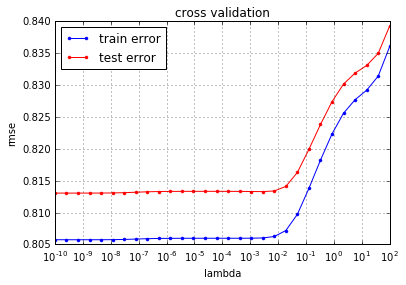

In [92]:
from plots import cross_validation_visualization
from build_k_indices import *

def cross_validation_demo():
    seed = 1
    k_fold = 4
    lambdas = np.logspace(-10, 2, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    mse_tr = []
    mse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for lambda_ in lambdas:
        trainerrors = []
        testerrors = []
        for k in range(k_fold):
            trainerror, testerror = cross_validation(y, tX, k_indices, k, lambda_)
            trainerrors.append(trainerror)
            testerrors.append(testerror)
        
        mse_tr.append(np.mean(trainerrors))
        mse_te.append(np.mean(testerrors))
    
    
    cross_validation_visualization(lambdas, mse_tr, mse_te)

cross_validation_demo()

Then we choose a lambda near zéro (then just a least_square_GD), we will test our stupid regression with least_square_GD and variation of gamma

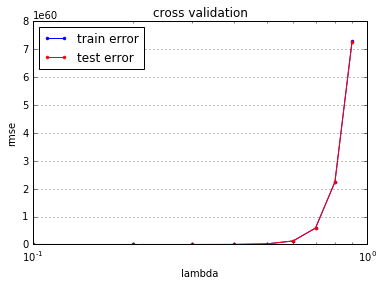

In [81]:
from costs import *
from build_polynomial import build_poly
from plots import cross_validation_visualization
from build_k_indices import *

def cross_validation(y, tX, k_indices, k, gamma):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    ytest = y[k_indices[k]]
    tXtest = tX[k_indices[k]]
    
    not_k = np.array([i for i in range(len(y)) if i not in k_indices[k]])
    ytrain = y[not_k]
    tXtrain = tX[not_k]

    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    max_iters = 10
    loss, w = least_squares_GD(ytrain, tXtrain, gamma, max_iters)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_loss(ytrain, tXtrain, w)
    loss_te = compute_loss(ytest, tXtest, w)

    return loss_tr, loss_te


def cross_validation_demo():
    seed = 1
    k_fold = 4
    # lambdas = np.logspace(-10, 2, 30)
    gammas = np.arange(0.0, 1.0, 0.1)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    mse_tr = []
    mse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for gamma in gammas:
        trainerrors = []
        testerrors = []
        for k in range(k_fold):
            trainerror, testerror = cross_validation(y, tX, k_indices, k, gamma)
            trainerrors.append(trainerror)
            testerrors.append(testerror)
        
        mse_tr.append(np.mean(trainerrors))
        mse_te.append(np.mean(testerrors))
    
    cross_validation_visualization(gammas, mse_tr, mse_te)

cross_validation_demo()

Then we decide that a small gamma is ok, 0.5 seems good. We will just do one dummy prediction

In [82]:
gamma = 0.5
max_iters = 10
loss, w = least_squares_GD(y, tX, gamma, max_iters)

In [83]:
w

array([  8.10496951e+53,  -3.49906680e+53,  -5.13103798e+53,
        -1.97828376e+53,   6.36784999e+54,   6.46838401e+54,
         6.36688359e+54,  -1.59293423e+52,  -9.10573668e+52,
        -6.22027397e+53,  -8.92091582e+51,   3.37033567e+51,
         6.36743826e+54,  -2.16766559e+53,  -3.73854975e+49,
        -2.30833025e+49,  -2.73220875e+53,   1.62921679e+50,
        -6.79965782e+50,  -2.21631769e+53,   9.10361294e+48,
        -9.38131765e+53,  -2.11808611e+51,   3.80552203e+54,
         3.94937898e+54,   3.94923054e+54,   6.37648328e+54,
         6.36735529e+54,   6.36732500e+54,  -1.32040011e+53])

In [84]:
w

array([  8.10496951e+53,  -3.49906680e+53,  -5.13103798e+53,
        -1.97828376e+53,   6.36784999e+54,   6.46838401e+54,
         6.36688359e+54,  -1.59293423e+52,  -9.10573668e+52,
        -6.22027397e+53,  -8.92091582e+51,   3.37033567e+51,
         6.36743826e+54,  -2.16766559e+53,  -3.73854975e+49,
        -2.30833025e+49,  -2.73220875e+53,   1.62921679e+50,
        -6.79965782e+50,  -2.21631769e+53,   9.10361294e+48,
        -9.38131765e+53,  -2.11808611e+51,   3.80552203e+54,
         3.94937898e+54,   3.94923054e+54,   6.37648328e+54,
         6.36735529e+54,   6.36732500e+54,  -1.32040011e+53])

## Generate predictions and save ouput in csv format for submission:

In [61]:
DATA_TEST_PATH = 'test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [67]:
weights = w

In [68]:
OUTPUT_PATH = 'pred_test1.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)